# Normalização

Comparison between training with normalized states and non-normalized states.
___

In [139]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sys_simulator.general import load_with_pickle, sns_confidence_interval_plot
from copy import deepcopy
import os

In [140]:
EXP_NAME = 'normalizacao'

# ddpg
ALGO_NAME = 'ddpg'
norm_path = "/home/lucas/dev/sys-simulator-2/data/ddpg/script7/20210506-100648/log.pickle"
raw_path = "/home/lucas/dev/sys-simulator-2/data/ddpg/script7/20210516-134443/log.pickle"
# dql
# ALGO_NAME = 'dql'
# norm_path = "/home/lucas/dev/sys-simulator-2/data/dql/script52/20210508-144816/log.pickle"
# raw_path = "/home/lucas/dev/sys-simulator-2/data/dql/script52/20210514-080734/log.pickle"
# a2c
# ALGO_NAME = 'a2c'
# filepath = "D:\\Dev\\sys-simulator-2\\data\\a2c\\script16\\20210509-134816\\log.pickle"
# output path
# OUTPUT_PATH = f'D:\\Dev\\sys-simulator-2\\figs\\{EXP_NAME}\\{ALGO_NAME}'
OUTPUT_PATH = f'/home/lucas/dev/sys-simulator-2/figs/{EXP_NAME}/{ALGO_NAME}'

norm_data = load_with_pickle(norm_path)
raw_data = load_with_pickle(raw_path)

In [141]:
EVAL_EVERY = norm_data['eval_every']
print(EVAL_EVERY)
print(raw_data['eval_every'])

1000
1000


In [142]:
norm_train = norm_data['train_bags']
norm_test = norm_data['test_bags']
raw_train = raw_data['train_bags']
raw_test = raw_data['test_bags']

In [143]:
xx = norm_test['mue_sinrs']
xx = np.array(xx)
xx.shape

(500,)

In [144]:
xx = norm_train['mue_sinrs']
xx = np.array(xx)
xx.shape

(20, 500)

In [145]:
norm_mue_sinrs = deepcopy(norm_train['mue_sinrs'])
norm_mue_sinrs.append(norm_test['mue_sinrs'])
norm_mue_sinrs = np.array(norm_mue_sinrs)
raw_mue_sinrs = deepcopy(raw_train['mue_sinrs'])
raw_mue_sinrs.append(raw_test['mue_sinrs'])
raw_mue_sinrs = np.array(raw_mue_sinrs)

In [146]:
norm_d2d_sinrs = deepcopy(norm_train['d2d_sinrs'])
norm_d2d_sinrs.append(norm_test['d2d_sinrs'])
norm_d2d_sinrs = np.array(norm_d2d_sinrs)
raw_d2d_sinrs = deepcopy(raw_train['d2d_sinrs'])
raw_d2d_sinrs.append(raw_test['d2d_sinrs'])
raw_d2d_sinrs = np.array(raw_d2d_sinrs)

In [147]:
sinr_threshold = norm_data['mue_sinr_threshold']
norm_mue_avail = deepcopy(norm_mue_sinrs >= sinr_threshold)
raw_mue_avail = deepcopy(raw_mue_sinrs >= sinr_threshold)

In [148]:
norm_rewards = deepcopy(norm_train['rewards'])
norm_rewards.append(norm_test['rewards'])
norm_rewards = np.array(norm_rewards)
raw_rewards = deepcopy(raw_train['rewards'])
raw_rewards.append(raw_test['rewards'])
raw_rewards = np.array(raw_rewards)

## Fonts configs

In [149]:
x_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
y_font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 16,
}
ticks_font = {
    'fontfamily': 'serif',
    'fontsize': 13
}
legends_font = {
    'size': 13,
    'family': 'serif'
}

## Ticks

In [150]:
x_ticks = [i*EVAL_EVERY*(norm_mue_sinrs.shape[0]-1)/5 for i in range(6)]

## MUE SINR

In [151]:
x = np.ones(norm_mue_sinrs.shape)
for i in range(norm_mue_sinrs.shape[0]):
    x[i, :] = i
x = x.reshape(-1)
x *= EVAL_EVERY

/home/lucas/dev/sys-simulator-2/figs/normalizacao/ddpg/mue-sinr.svg


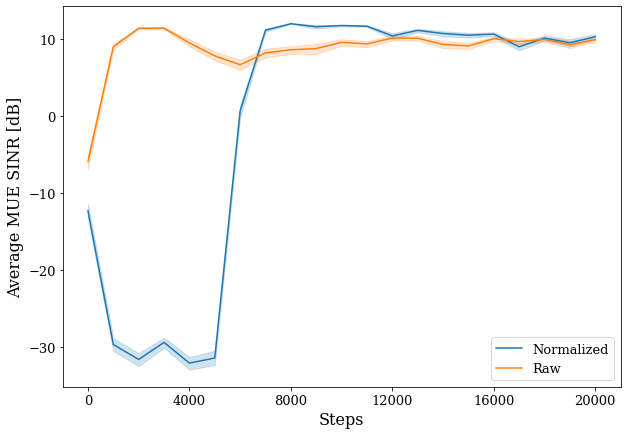

In [152]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=norm_mue_sinrs.reshape(-1), label='Normalized')
sns.lineplot(x=x, y=raw_mue_sinrs.reshape(-1), label='Raw')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average MUE SINR [dB]', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'mue-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

In [153]:
## D2D SINR

/home/lucas/dev/sys-simulator-2/figs/normalizacao/ddpg/d2d-sinr.svg


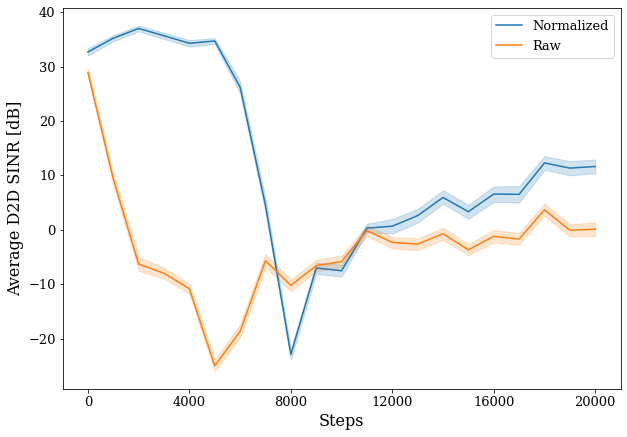

In [154]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=norm_d2d_sinrs[:,:,0].reshape(-1), label='Normalized')
sns.lineplot(x=x, y=raw_d2d_sinrs[:,:,0].reshape(-1), label='Raw')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average D2D SINR [dB]', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'd2d-sinr'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## MUE availability

/home/lucas/dev/sys-simulator-2/figs/normalizacao/ddpg/mue-availability.svg


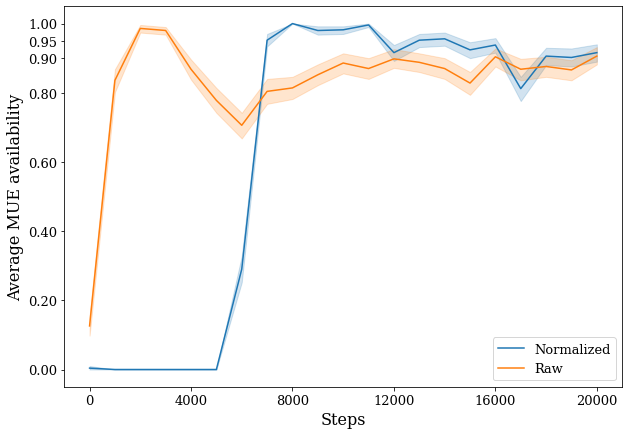

In [155]:
plt.figure(figsize=(10,7))
sns.lineplot(x=x, y=norm_mue_avail.reshape(-1), label='Normalized')
sns.lineplot(x=x, y=raw_mue_avail.reshape(-1), label='Raw')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average MUE availability', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks([0., .2, .4, .6, .8, .9, .95, 1.], **ticks_font)
plt.legend(prop=legends_font)
fig_name = 'mue-availability'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()

## Rewards

/home/lucas/dev/sys-simulator-2/figs/normalizacao/ddpg/rewards.svg


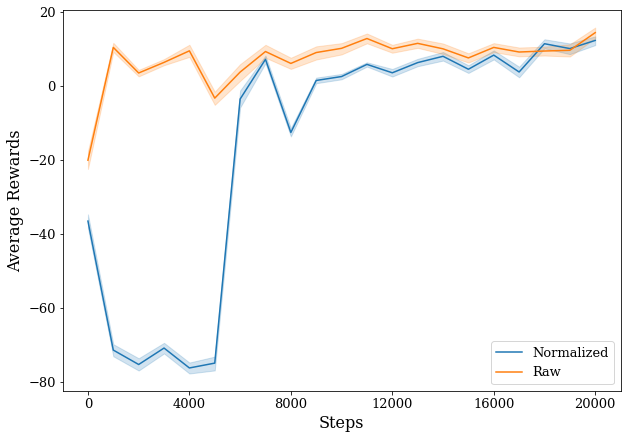

In [156]:
plt.figure(figsize=(10,7))
if ALGO_NAME != 'ddpg':
    sns.lineplot(x=x, y=norm_rewards[:,:,0].reshape(-1), label='Normalized')
    sns.lineplot(x=x, y=raw_rewards[:,:,0].reshape(-1), label='Raw')
    # sns.lineplot(x=x, y=rewards[:,:,1].reshape(-1), label='Device 2')
else:
    sns.lineplot(x=x, y=norm_rewards.reshape(-1), label='Normalized')
    sns.lineplot(x=x, y=raw_rewards.reshape(-1), label='Raw')
plt.xlabel('Steps', fontdict=x_font)
plt.ylabel('Average Rewards', fontdict=y_font)
plt.xticks(x_ticks, **ticks_font)
plt.yticks(**ticks_font)
plt.legend(prop=legends_font)
fig_name = 'rewards'
svg_path = f'{OUTPUT_PATH}/{fig_name}.svg'
eps_path = f'{OUTPUT_PATH}/{fig_name}.eps'
print(svg_path)
# save fig
plt.savefig(svg_path)
os.system(f'magick convert {svg_path} {eps_path}')
plt.show()